In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import time
# preprocessing and pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from outlier_cleaner import OutlierCleaner



# sklearn libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    VotingRegressor, StackingRegressor, RandomForestClassifier, VotingClassifier
)

# sklearn metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from extended_sklearn_metrics import evaluate_model_with_cross_validation

# extra model
import xgboost as xgb

import joblib

In [297]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv', nrows=20000)
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,59,Male,Urban,High,0,0,236,0,122,1,...,77,114,52,130,95,Normal,1,0,1,0
19996,71,Female,Urban,Middle,0,0,162,1,91,1,...,94,129,54,164,183,Abnormal,0,1,0,0
19997,59,Female,Urban,High,0,1,214,0,83,1,...,79,140,24,159,158,Normal,0,0,1,0
19998,75,Male,Urban,Middle,0,0,179,0,72,0,...,86,135,62,128,154,Normal,0,0,1,0


In [298]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')

In [299]:
df.isna().any()

age                               False
gender                            False
region                            False
income_level                      False
hypertension                      False
diabetes                          False
cholesterol_level                 False
obesity                           False
waist_circumference               False
family_history                    False
smoking_status                    False
alcohol_consumption               False
physical_activity                 False
dietary_habits                    False
air_pollution_exposure            False
stress_level                      False
sleep_hours                       False
blood_pressure_systolic           False
blood_pressure_diastolic          False
fasting_blood_sugar               False
cholesterol_hdl                   False
cholesterol_ldl                   False
triglycerides                     False
EKG_results                       False
previous_heart_disease            False


In [300]:
df.duplicated().any()

False

In [301]:
df.dtypes

age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results                       

In [302]:
cat_df = df.select_dtypes(include='object')
cat_df

,gender,region,income_level,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,EKG_results
0,Male,Rural,Middle,Never,None,High,Unhealthy,Moderate,Moderate,Normal
1,Female,Urban,Low,Past,None,Moderate,Healthy,High,High,Normal
2,Female,Urban,Low,Past,Moderate,Moderate,Healthy,Low,Low,Abnormal
3,Male,Urban,Low,Never,Moderate,Moderate,Unhealthy,Low,High,Normal
4,Male,Urban,Middle,Current,Moderate,Moderate,Unhealthy,High,Moderate,Normal
...,...,...,...,...,...,...,...,...,...,...
19995,Male,Urban,High,Past,Moderate,Low,Healthy,Moderate,High,Normal
19996,Female,Urban,Middle,Past,None,High,Unhealthy,Moderate,Low,Abnormal
19997,Female,Urban,High,Current,Moderate,Low,Healthy,Low,High,Normal
19998,Male,Urban,Middle,Current,Moderate,Moderate,Healthy,Low,High,Normal


In [303]:
num_df = df.select_dtypes(exclude='object')
num_df

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,0,1,211,0,83,0,5.970603,113,62,173,48,121,101,0,0,0,0
1,53,0,0,208,0,106,1,5.643813,132,76,70,58,83,138,1,0,1,0
2,62,0,0,231,1,112,1,6.336197,116,74,118,69,130,171,0,1,0,1
3,73,1,0,202,0,82,1,7.912990,136,65,98,52,85,146,0,1,1,0
4,52,1,0,232,0,89,0,3.252338,127,75,104,59,127,139,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,59,0,0,236,0,122,1,6.376211,145,77,114,52,130,95,1,0,1,0
19996,71,0,0,162,1,91,1,8.348237,128,94,129,54,164,183,0,1,0,0
19997,59,0,1,214,0,83,1,6.691233,124,79,140,24,159,158,0,0,1,0
19998,75,0,0,179,0,72,0,6.456800,111,86,135,62,128,154,0,0,1,0


In [304]:
encoder = LabelEncoder()
for cols in cat_df:
    cat_df[cols+'_encoded'] = encoder.fit_transform(cat_df[cols])
cat_df = cat_df.select_dtypes(exclude='object')
# len(cat_df.columns)
cat_df

,gender_encoded,region_encoded,income_level_encoded,smoking_status_encoded,alcohol_consumption_encoded,physical_activity_encoded,dietary_habits_encoded,air_pollution_exposure_encoded,stress_level_encoded,EKG_results_encoded
0,1,0,2,1,2,0,1,2,2,1
1,0,1,1,2,2,2,0,0,0,1
2,0,1,1,2,1,2,0,1,1,0
3,1,1,1,1,1,2,1,1,0,1
4,1,1,2,0,1,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,2,1,1,0,2,0,1
19996,0,1,2,2,2,0,1,2,1,0
19997,0,1,0,0,1,1,0,1,0,1
19998,1,1,2,0,1,2,0,1,0,1


In [305]:
df = pd.concat([cat_df, num_df], axis=1)

In [306]:
df

,gender_encoded,region_encoded,income_level_encoded,smoking_status_encoded,alcohol_consumption_encoded,physical_activity_encoded,dietary_habits_encoded,air_pollution_exposure_encoded,stress_level_encoded,EKG_results_encoded,...,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,1,0,2,1,2,0,1,2,2,1,...,113,62,173,48,121,101,0,0,0,0
1,0,1,1,2,2,2,0,0,0,1,...,132,76,70,58,83,138,1,0,1,0
2,0,1,1,2,1,2,0,1,1,0,...,116,74,118,69,130,171,0,1,0,1
3,1,1,1,1,1,2,1,1,0,1,...,136,65,98,52,85,146,0,1,1,0
4,1,1,2,0,1,2,1,0,2,1,...,127,75,104,59,127,139,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,2,1,1,0,2,0,1,...,145,77,114,52,130,95,1,0,1,0
19996,0,1,2,2,2,0,1,2,1,0,...,128,94,129,54,164,183,0,1,0,0
19997,0,1,0,0,1,1,0,1,0,1,...,124,79,140,24,159,158,0,0,1,0
19998,1,1,2,0,1,2,0,1,0,1,...,111,86,135,62,128,154,0,0,1,0


In [307]:
df.dtypes

gender_encoded                      int32
region_encoded                      int32
income_level_encoded                int32
smoking_status_encoded              int32
alcohol_consumption_encoded         int32
physical_activity_encoded           int32
dietary_habits_encoded              int32
air_pollution_exposure_encoded      int32
stress_level_encoded                int32
EKG_results_encoded                 int32
age                                 int64
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                     

In [308]:
len(df.columns.tolist())

28

In [309]:
df.isna().any()

gender_encoded                    False
region_encoded                    False
income_level_encoded              False
smoking_status_encoded            False
alcohol_consumption_encoded       False
physical_activity_encoded         False
dietary_habits_encoded            False
air_pollution_exposure_encoded    False
stress_level_encoded              False
EKG_results_encoded               False
age                               False
hypertension                      False
diabetes                          False
cholesterol_level                 False
obesity                           False
waist_circumference               False
family_history                    False
sleep_hours                       False
blood_pressure_systolic           False
blood_pressure_diastolic          False
fasting_blood_sugar               False
cholesterol_hdl                   False
cholesterol_ldl                   False
triglycerides                     False
previous_heart_disease            False


In [310]:
df.duplicated().any()

False

In [311]:
cleaner = OutlierCleaner(df, preserve_index=True)
for column in df:
    analysis = cleaner.analyze_distribution(column)
    print(f"\n{column} Analysis:")
    print(f"- Skewness: {analysis['skewness']:.2f}")
    print(f"- Recommended method: {analysis['recommended_method']}")


gender_encoded Analysis:
- Skewness: -0.08
- Recommended method: modified_zscore

region_encoded Analysis:
- Skewness: -0.62
- Recommended method: modified_zscore

income_level_encoded Analysis:
- Skewness: -0.52
- Recommended method: modified_zscore

smoking_status_encoded Analysis:
- Skewness: 0.01
- Recommended method: modified_zscore

alcohol_consumption_encoded Analysis:
- Skewness: -0.99
- Recommended method: modified_zscore

physical_activity_encoded Analysis:
- Skewness: -0.34
- Recommended method: modified_zscore

dietary_habits_encoded Analysis:
- Skewness: -0.40
- Recommended method: modified_zscore

air_pollution_exposure_encoded Analysis:
- Skewness: -0.58
- Recommended method: modified_zscore

stress_level_encoded Analysis:
- Skewness: -0.40
- Recommended method: modified_zscore

EKG_results_encoded Analysis:
- Skewness: -1.49
- Recommended method: modified_zscore

age Analysis:
- Skewness: 0.04
- Recommended method: modified_zscore

hypertension Analysis:
- Skewness: 0.

In [312]:
cleaned_df, info = cleaner.clean_columns(
    method='zscore',
    show_progress=True
)
cleaned_df

Cleaning columns: 100%|██████████| 28/28 [00:00<00:00, 223.63it/s]


,gender_encoded,region_encoded,income_level_encoded,smoking_status_encoded,alcohol_consumption_encoded,physical_activity_encoded,dietary_habits_encoded,air_pollution_exposure_encoded,stress_level_encoded,EKG_results_encoded,...,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,1,0,2,1,2,0,1,2,2,1,...,113,62,173,48,121,101,0,0,0,0
1,0,1,1,2,2,2,0,0,0,1,...,132,76,70,58,83,138,1,0,1,0
2,0,1,1,2,1,2,0,1,1,0,...,116,74,118,69,130,171,0,1,0,1
3,1,1,1,1,1,2,1,1,0,1,...,136,65,98,52,85,146,0,1,1,0
4,1,1,2,0,1,2,1,0,2,1,...,127,75,104,59,127,139,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,2,1,1,0,2,0,1,...,145,77,114,52,130,95,1,0,1,0
19996,0,1,2,2,2,0,1,2,1,0,...,128,94,129,54,164,183,0,1,0,0
19997,0,1,0,0,1,1,0,1,0,1,...,124,79,140,24,159,158,0,0,1,0
19998,1,1,2,0,1,2,0,1,0,1,...,111,86,135,62,128,154,0,0,1,0


In [313]:
df = cleaned_df

In [314]:
df.corr().sort_values(by='heart_attack')

,gender_encoded,region_encoded,income_level_encoded,smoking_status_encoded,alcohol_consumption_encoded,physical_activity_encoded,dietary_habits_encoded,air_pollution_exposure_encoded,stress_level_encoded,EKG_results_encoded,...,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
smoking_status_encoded,0.008039,0.009367,0.006742,1.000000,0.005613,-0.011255,-0.004826,0.005432,0.006396,-0.013810,...,-0.003657,0.002801,0.002713,0.017634,0.006253,0.006772,0.001028,0.003261,0.001872,-0.136860
alcohol_consumption_encoded,0.004402,0.012070,-0.006661,0.005613,1.000000,-0.003360,0.005353,0.016076,-0.010216,-0.004378,...,-0.008213,0.008283,-0.005243,0.001793,-0.004217,-0.001379,-0.000194,-0.013825,-0.003726,-0.015443
income_level_encoded,0.005584,0.008138,1.000000,0.006742,-0.006661,0.002826,-0.001119,0.009821,0.009706,0.003211,...,0.000599,0.000310,-0.002790,0.016407,0.002412,0.013512,-0.007756,0.001605,0.011349,-0.013902
gender_encoded,1.000000,-0.005555,0.005584,0.008039,0.004402,0.000320,-0.008453,-0.005667,0.009775,0.003087,...,0.004791,0.008242,0.011195,-0.003073,0.000465,0.002960,-0.022813,-0.003800,-0.003858,-0.013463
participated_in_free_screening,-0.003858,0.003331,0.011349,0.001872,-0.003726,0.008193,0.000133,-0.007552,0.004143,0.001488,...,0.008800,0.004616,-0.004751,0.009213,0.004382,0.007234,0.020086,0.003155,1.000000,-0.010793
sleep_hours,-0.000816,-0.003142,-0.002686,-0.009442,-0.005161,-0.004965,0.001822,-0.009002,-0.008818,-0.003930,...,-0.000113,-0.000216,0.004344,-0.004565,-0.009363,-0.003042,0.005600,-0.008157,0.014618,-0.010716
region_encoded,-0.005555,1.000000,0.008138,0.009367,0.012070,0.002651,0.003845,-0.003103,-0.001313,0.010989,...,-0.009057,0.006094,-0.008612,0.001764,0.000812,0.013526,0.000901,0.003030,0.003331,-0.008909
cholesterol_hdl,-0.003073,0.001764,0.016407,0.017634,0.001793,0.009571,0.005448,0.004740,0.011950,-0.009446,...,-0.007774,0.000700,-0.014154,1.000000,-0.008848,-0.000230,0.005075,-0.005258,0.009213,-0.008241
family_history,-0.003609,0.011285,-0.001038,-0.003291,0.005861,0.002960,0.009245,0.002395,-0.005292,-0.011100,...,0.002608,0.010104,-0.002427,-0.004357,-0.000131,0.008171,0.009602,-0.002593,-0.005256,-0.007348
dietary_habits_encoded,-0.008453,0.003845,-0.001119,-0.004826,0.005353,-0.018533,1.000000,0.003700,-0.006751,0.009852,...,-0.009018,-0.003378,0.001984,0.005448,-0.002625,-0.004973,0.001483,0.003686,0.000133,-0.005817


<Axes: xlabel='heart_attack'>

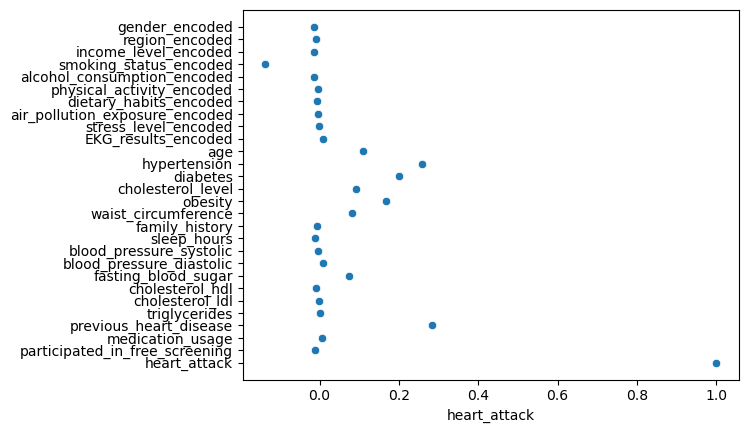

In [315]:
sns.scatterplot(data=df.corr(), x='heart_attack', y=df.columns.tolist())

In [316]:
x = df.drop('heart_attack', axis=1)
y = df['heart_attack']



In [317]:
x

,gender_encoded,region_encoded,income_level_encoded,smoking_status_encoded,alcohol_consumption_encoded,physical_activity_encoded,dietary_habits_encoded,air_pollution_exposure_encoded,stress_level_encoded,EKG_results_encoded,...,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening
0,1,0,2,1,2,0,1,2,2,1,...,5.970603,113,62,173,48,121,101,0,0,0
1,0,1,1,2,2,2,0,0,0,1,...,5.643813,132,76,70,58,83,138,1,0,1
2,0,1,1,2,1,2,0,1,1,0,...,6.336197,116,74,118,69,130,171,0,1,0
3,1,1,1,1,1,2,1,1,0,1,...,7.912990,136,65,98,52,85,146,0,1,1
4,1,1,2,0,1,2,1,0,2,1,...,3.252338,127,75,104,59,127,139,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,1,0,2,1,1,0,2,0,1,...,6.376211,145,77,114,52,130,95,1,0,1
19996,0,1,2,2,2,0,1,2,1,0,...,8.348237,128,94,129,54,164,183,0,1,0
19997,0,1,0,0,1,1,0,1,0,1,...,6.691233,124,79,140,24,159,158,0,0,1
19998,1,1,2,0,1,2,0,1,0,1,...,6.456800,111,86,135,62,128,154,0,0,1


In [318]:
y

0        0
1        0
2        1
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: heart_attack, Length: 19631, dtype: int64

In [319]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [320]:
X_train.shape, X_test.shape

((13741, 27), (5890, 27))

In [321]:
# scaler = StandardScaler()

In [322]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_train_scaled, X_train_scaled[0]

In [323]:
SEED = 42

In [324]:
# dt = DecisionTreeClassifier()
# rf = RandomForestClassifier(random_state=SEED)
# svc = SVC()

In [325]:
# voting_classifier = VotingClassifier(
#     estimators=[('rf',rf),('dt',dt),('svc',svc)],
# )

In [326]:
# pipeline = Pipeline([
#     ('scaler',StandardScaler()),
#     ('classifier',voting_classifier),
# ])

In [327]:
# pipeline.fit(X_train, y_train)

In [328]:
# y_prediction = pipeline.predict(X_test)

In [329]:
# cm = confusion_matrix(y_test,y_prediction)
# sns.heatmap(cm, annot=True )
# plt.show()

In [330]:
# print(classification_report(y_test, y_prediction))

In [331]:
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsRegressor(),
    'XGBoost': xgb.XGBClassifier()
}

In [ ]:
results = []
for name, model in models.items():
    pipeline = Pipeline([
        (['classifier'|'regressor'], model)
    ])
    pipeline.fit(X_train,y_train)
    y_prediction = pipeline.predict(X_test)
    results.append({
        'model': name,
        'R2_score': r2_score(y_test, y_prediction),
        'RMSE': [mean_squared_error(y_test, y_prediction)],
    })
results

[{'model': 'DecisionTreeClassifier',
  'R2_score': -0.43790611664295853,
  'RMSE': [0.3460101867572156]},
 {'model': 'SVM',
  'R2_score': -0.6707368421052631,
  'RMSE': [0.4020373514431239]},
 {'model': 'RandomForestClassifier',
  'R2_score': -0.09359886201991463,
  'RMSE': [0.2631578947368421]},
 {'model': 'KNeighborsClassifier',
  'R2_score': -0.13522617354196287,
  'RMSE': [0.2731748726655348]},
 {'model': 'XGBoost',
  'R2_score': -0.12040967283072534,
  'RMSE': [0.2696095076400679]}]